## Excercise - 1 - Linear regression with one variable

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

### Plotting the data

In [2]:
import os;
path = os.getcwd() + '/data/ex1data1.txt';
data = pd.read_csv(path, header=None, names=['Population', 'Profit']);
data.head(n=5) # List first 5 rows from the dataset

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [18]:
data.describe() # describe the dataset properties

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


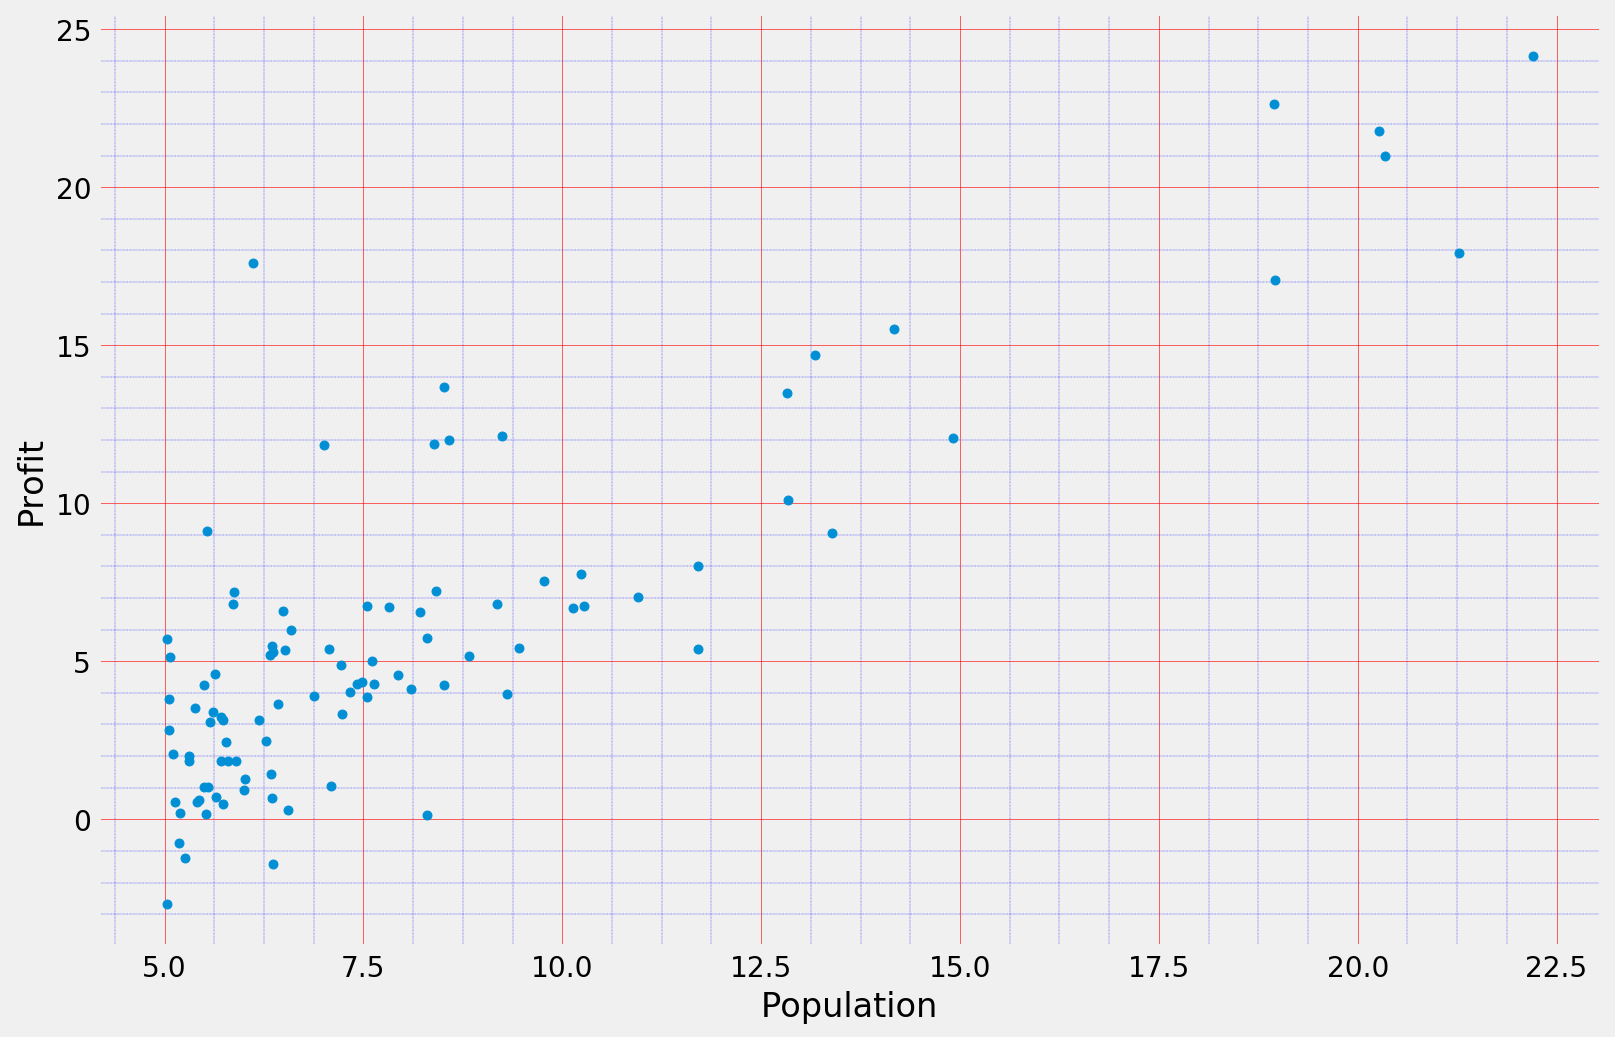

In [19]:
ax = data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))
# ax.xaxis.grid(True, linestyle='-', linewidth=0.25)
# ax.yaxis.grid(True, linestyle='-', linewidth=0.25)
# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html
ls = (0, (3, 1, 1, 1, 1, 1))

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=ls, linewidth='0.2', color='blue')
# Turn off the display of all ticks.
ax.tick_params(which='both') # turn off bottom ticks

### Gradient Descent

In [3]:
data.insert(0, 'Ones', 1)

In [21]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [4]:
cols = data.shape[1]; # read only no. of columns
X = data.iloc[:,0:cols-1];
y = data.iloc[:, cols-1:cols];

In [104]:
# TEST CASE for computeCost function
# computeCost( [1 2; 1 3; 1 4; 1 5], [7;6;5;4], [0.1;0.2] )
_X = np.matrix([[1, 2],[1, 3], [1, 4], [1, 5]]);
_y = np.matrix([7, 6, 5, 4]);
_theta = np.matrix([[0.1], [0.2]]);
print('X = ', _X.shape);
print('y = ', _y.shape);
print('theta = ', len(_theta));

J = computeCost(_X, _y, _theta);
J

X =  (4, 2)
y =  (1, 4)
theta =  2


46.78

In [103]:
def computeCost(X, y, theta):
    m = len(X);
    # print('m = %d' %m);
    h = X * theta; # (2 X 4) * (4 X 1)
    squ_Err = np.power((h - y), 2);
    sumSq_Err = np.sum(squ_Err);
    J = (1/(2 * m)) * sumSq_Err;
    return J;   
    

In [97]:
theta = np.zeros(shape=(2, 1));

In [98]:
J = computeCost(X, y, theta);
J

ValueError: Unable to coerce to DataFrame, shape must be (97, 2): given (1, 2)

In [10]:
iteration = 1500;
alpha = 0.01;

In [88]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(X)
    J_history = np.zeros(shape=(num_iters, 1))
    tmpTheta = np.matrix(np.zeros(shape=theta.shape))
    parameters = int(theta.ravel().shape[1])
    print(parameters)
    for i in range(num_iters):
        hs = (X * theta.T) - y
        for j in range(parameters):
            sumPred = alpha * (1/m) * (np.sum(hs * X[:, j]))
            tmpTheta[0, j] = theta[0, j] - sumPred
            # print(tmpTheta)
            # theta[j] = tmpTheta
            # print(theta[j])
            #print(np.matrix(theta))
        theta = tmpTheta     
        J_history[i] = computeCost(X, y, theta)    
    return theta, J_history

In [89]:
theta, J_hist = gradientDescent(np.matrix([[1, 5], [1, 2], [1, 4], [1, 5]]),
                                 np.matrix([[1, 6, 4, 2]]),
                                 np.matrix([[0, 0]]), 0.01, 5);
theta

2


ValueError: shapes (4,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)